## Handwritten Digit Recognition using K-NN

In [4]:
from sklearn.datasets import load_digits
digits = load_digits()

In [5]:
type(digits)

sklearn.utils._bunch.Bunch

In [6]:
import numpy as np
import matplotlib.pyplot as plt 

In [7]:
# Print to show there are 1797 images ( 8 by 8 images: dimentionsality of 64 )

print(" Image Dataset Shape " , digits.data.shape)

 Image Dataset Shape  (1797, 64)


In [8]:
first_image = digits.data[0,:]
x = digits.data
x.shape

(1797, 64)

In [9]:
print(first_image)

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]



 first image shape =  (64,)


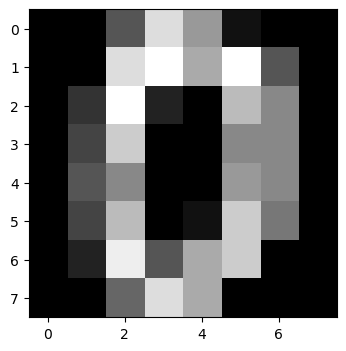

In [12]:
plt.figure(figsize =(10,4))
plt.imshow(np.reshape(first_image, (8,8)) , cmap = plt.cm.gray);
print('\n first image shape = ' , first_image.shape)

## Visualizing Dataset

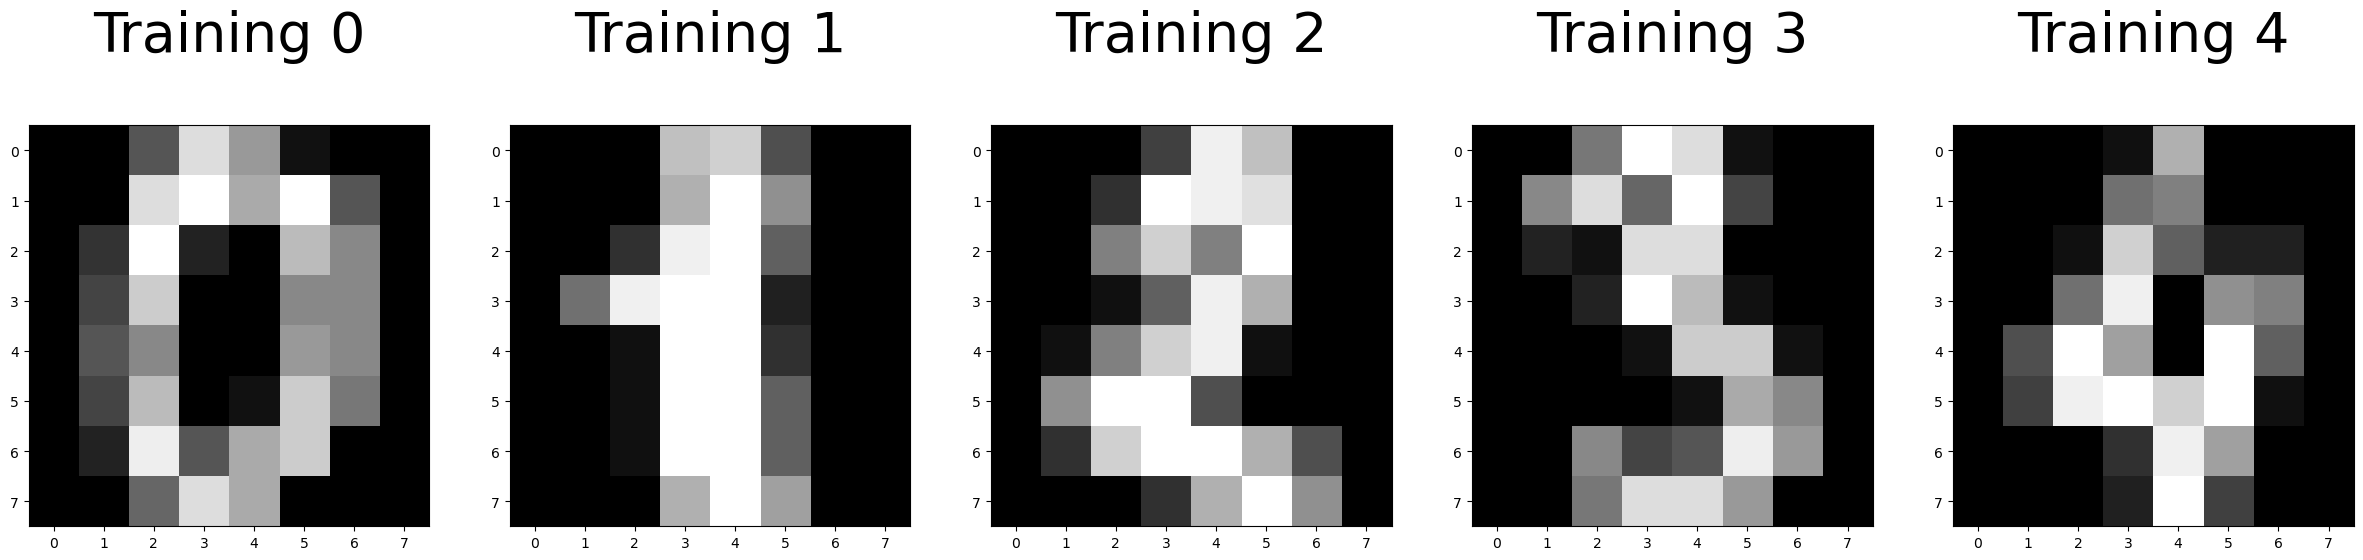

In [11]:
plt.figure(figsize = (30 , 7))
for index , (image , label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1,5, index +1 )
    plt.imshow(np.reshape(image , (8 , 8)) , cmap = plt.cm.gray)
    plt.title('Training %i\n '  %label , fontsize =40)

## splitting the dataset

In [12]:
from sklearn.model_selection import train_test_split
xtrain ,xtest , ytrain , ytest = train_test_split(digits.data , digits.target , test_size = 0.30 , random_state = 25 , shuffle = True)

In [13]:
print(xtrain.shape)

(1257, 64)


In [14]:
print(ytrain.shape)

(1257,)


In [15]:
ytest.shape

(540,)

## Training 

In [16]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors =5)
classifier.fit(xtrain , ytrain)

predictions = classifier.predict(xtest)

## Model Evaluation

In [17]:
# checking one by one 

answer = classifier.predict(xtest[120 , :].reshape(1 , -1))

In [18]:
print(answer , ytest[120])

[9] 9


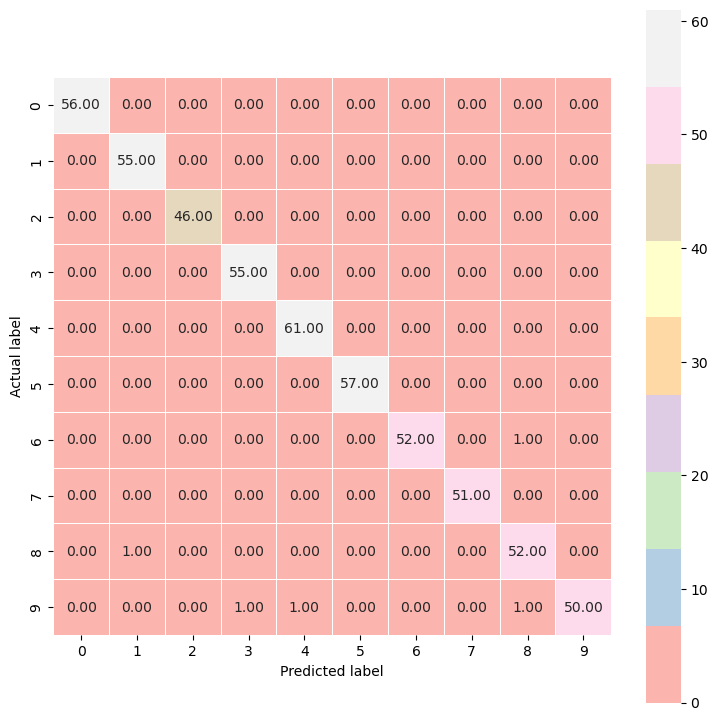

In [20]:
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import metrics 
cm = metrics.confusion_matrix(ytest , predictions)
plt.figure(figsize= (9,9))
sns.heatmap(cm ,annot=True , fmt=".2f" , linewidths = 0.5 , square = True , cmap = 'Pastel1');
plt.ylabel('Actual label')
plt.xlabel('Predicted label');

## Comparing Error Rate with the K value 

In [49]:
error =[]
#Calculating error for k values between 1 and 40 
for i in range(1 , 50):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(xtrain , ytrain)
    pred_i = knn.predict(xtest)
    error.append(np.mean(pred_i != ytest))

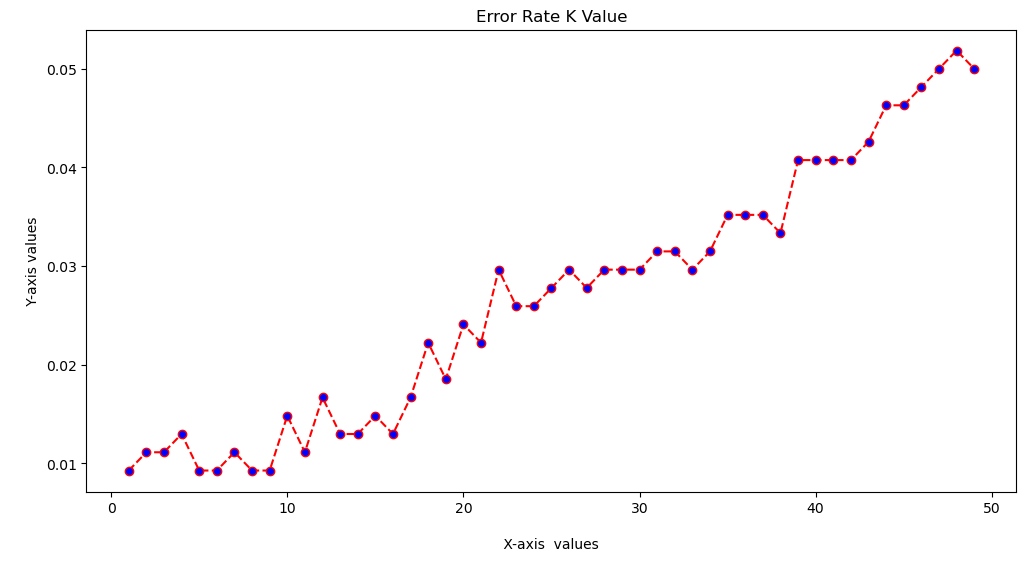

In [52]:
plt.figure(figsize=(12,6))
plt.plot(range(1,50) , error , color = 'red' , linestyle ='dashed' , marker ='o' , markerfacecolor = 'blue')
plt.title('Error Rate K Value')
plt.xlabel('\n X-axis  values ');
plt.ylabel('\n Y-axis values ');

### Task

image should be grey scale , and convert that 8 by 8 (quality of image , covering full image , resize image , 
                                                     
                                                     convert to rgb , then resize and then flat that image )

1  Take photo from mobile of any digit 


2  Open new notebook 
3  Import Saved Model in new NB
4 Perform prediction on your own Generated Image 


Perform preprocessing og the Image that it be converted into 8 by 8 

phir is ko flat karein. 


In [84]:
# Saving the model 

import joblib
joblib.dump(classifier , 'NB-digitclassification')

['NB-digitclassification']

In [85]:
# Reusing the saved model for predictions 
loaded_model = joblib.load('NB-digitclassification')